## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 4: Linear Algebra
## Due 30 October, 2019 at 6:00 PM
### <span style="color: red">Kevin Egedy</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 4. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory subset the general subject of Linear Algebra, for example covered in the following online books:
    - [Beezer](http://linear.ups.edu/html/fcla.html). Does not cover matrix exponentials, Caley-Hamilton, SVD, or PCA.
    - [Hefferon](http://joshua.smcvt.edu/linearalgebra/book.pdf). Also does not cover the above.
- The more advanced ideas are covered online as well. For example:
    - Matrix Exponentials are typically not covered until a course on linear different equations. But the [Wikipedia page](https://en.wikipedia.org/wiki/Matrix_exponential) is pretty good.
    - [Caley-Hamilton](https://brilliant.org/wiki/cayley-hamilton-theorem/)
    - [SVD](https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf)
    - [PCA](https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)
- If you want the **best** textbooks in linear algebra, get
    - [Strang](https://www.amazon.com/Introduction-Linear-Algebra-Gilbert-Strang/dp/0980232775). Introductory. See also [Strang's Online Lectures](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/).
    - [Horn and Johnson](http://www.cse.zju.edu.cn/eclass/attachments/2015-10/01-1446086008-145421.pdf)

In [1]:
# Imports
import io
import requests
import pandas as pd
import numpy as np
import sympy as sp
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Linear independence 

Which of the following sets of vectors are linearly independent? Why?

a) $\left (
\begin{array}{c}
1 \\
2 \\
3 \\
4
\end{array}
\right )$ and $\left (
\begin{array}{c}
5 \\
6 \\
7 \\
8
\end{array}
\right )$

b) $\left (
\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}
\right )$ and $\left (
\begin{array}{c}
1 \\
0 \\
0 \\
1
\end{array}
\right )$

c) $\left (
\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}
\right )$ and $\left (
\begin{array}{c}
0 \\
1 \\
0 \\
1
\end{array}
\right )$

<hr>

**Def:** A set of vectors $v_1,...,v_n$ is **linearly independent** if there exist scalars $a_1, ..., a_n$ that are not all zero but for which 

$$
a_1 v_1 + ... + a_n v_n = 0.
$$

<hr>

Let $v_1 = $
$\left (
\begin{array}{c}
1 \\
2 \\
3 \\
4
\end{array}
\right )$ and $v_2 = $
$\left (
\begin{array}{c}
5 \\
6 \\
7 \\
8
\end{array}
\right )$,
<br>
then $v_1$ and $v_2$ are not linearly independent. There is not a (non-zero) linear combination equal to $0$.

In [2]:
# Python 
a1,a2 = sp.symbols('a1,a2')
v1 = np.array([1,2,3,4])
v2 = np.array([5,6,7,8])
expr = a1*v1+a2*v2
sp.linsolve(sp.Array(expr), (a1,a2))

{(0, 0)}

Let $v_1 = $
$\left (
\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}
\right ), v_2 = $
$\left (
\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}
\right ), v_3 = $
$\left (
\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}
\right )$, and $v_4 = $
$\left (
\begin{array}{c}
1 \\
0 \\
0 \\
1
\end{array}
\right )$
<br>
then $v_1, v_2, v_3,$ and $v_4$ are linearly independent.
<br>
There exists a linear combination equal to $0$. For example $v_1 + v_2 - v_3 - v_4 = 0$.

In [3]:
# Python
a1,a2,a3,a4 = sp.symbols('a1,a2,a3,a4')
v1 = np.array([1,1,0,0])
v2 = np.array([0,0,1,1])
v3 = np.array([0,1,1,0])
v4 = np.array([1,0,0,1])
expr = a1*v1+a2*v2+a3*v3+a4*v4
sp.linsolve(sp.Array(expr), (a1,a2,a3,a4))

{(-a4, -a4, a4, a4)}

Let $v_1 = $ 
$\left (
\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}
\right ), v_2 = $
$\left (
\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}
\right ), v_3 = $ 
$\left (
\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}
\right ),$ and $v_4 = $
$\left (
\begin{array}{c}
0 \\
1 \\
0 \\
1
\end{array}
\right )$
<br>
then $v_1, v_2, v_3,$ and $v_4$ are not linearly independent. There is not a (non-zero) linear combinations that equals zero.

In [4]:
# Python
a1,a2,a3,a4 = sp.symbols('a1,a2,a3,a4')
v1 = np.array([1,1,0,0])
v2 = np.array([0,0,1,1])
v3 = np.array([0,1,1,0])
v4 = np.array([0,1,0,1])
expr = a1*v1+a2*v2+a3*v3+a4*v4
sp.linsolve(sp.Array(expr), (a1,a2,a3,a4))

{(0, 0, 0, 0)}

### 2. Orthogonality

a) Find two orthogonal vectors that are also orthogonal to the vector
$v = \left (
\begin{array}{c}
1 \\
-1 \\
3 \\
\end{array}
\right ).$

b) Argue that the resulting set of three vectors form a basis for for $\mathbb{R}^3$.

c) Express the vector $x = \left (
\begin{array}{c}
1 \\
2 \\
3
\end{array}
\right )$ as a linear combination of your three vectors. 

<hr>

**Def:** Two vectors $u$ and $v$ are **orthogonal** if $u^Tv = 0$. 

<hr>

**Property:** The columns of an orthogonal matrix $A \in \mathbb{R}^{n \times n}$ form an **orthonormal basis** of $\mathbb{R}^{n \times n}$. That is

- Each column is a unit vector
- Each pair of columns is orthogonal
- And they are all independent (follows from the second point). 

<hr>

Two vectors that are orthogonal to
$v = 
\left (
\begin{array}{c}
1 \\
-1 \\
3 \\
\end{array}
\right ).$
are 
$\left (
\begin{array}{c}
-2 \\
1 \\
1 \\
\end{array}
\right )$ and
$\left (
\begin{array}{c}
4 \\
7 \\
1 \\
\end{array}
\right )$.

The resulting set of 3 orthogonal vectors is the basis for $\mathbb{R}^3$ because they are linearly independent and span the vector space.

Given $v_1 = $ 
$\left (
\begin{array}{c}
1 \\
-1 \\
3
\end{array}
\right ), v_2 = $
$\left (
\begin{array}{c}
-2 \\
1 \\
1
\end{array}
\right ), v_3 = $ 
$\left (
\begin{array}{c}
4 \\
7 \\
1
\end{array}
\right ),$ choose $a_1, a_2, a_3 = 
\frac{8}{11},
\frac{1}{2},
\frac{7}{22}
$ such that 
$$
\frac{8}{11}
\left (
    \begin{array}{c}
    1 \\
    -1 \\
    3
    \end{array}
\right ) + 
\frac{1}{2}
\left (
    \begin{array}{c}
    -2 \\
    1 \\
    1
    \end{array}
\right ) +  
\frac{7}{22}
\left (
    \begin{array}{c}
    4 \\
    7 \\
    1
    \end{array}
\right ) =
\left (
    \begin{array}{c}
    1 \\
    2 \\
    3
    \end{array}
\right ).
$$

In [5]:
# Sympy vectors
u1,u2,u3 = sp.symbols('u1,u2,u3')
u = np.array([u1,u2,u3])
v = np.array([1,-1,3])

In [6]:
# Orthogonal to v = [1,-1,3]
expr = np.dot(u.T,v)  

# Solve for 1st orthogonal vector
sol = sp.linsolve(sp.Array(expr), (u1,u2,u3))
sol = next(iter(sol))
v1 = np.array(sol)    # [u2 - 3*u3, u2, u3]
v1_eval = np.array(sol.subs({u1:1,u2:1,u3:1})) # [-2,1,1]
v1_eval

array([-2, 1, 1], dtype=object)

In [7]:
# Orthogonal to v1_eval = [-2,1,1]
expr = np.dot(u.T,v1_eval)

# Solve generic orthogonal expression to v1
sol = sp.linsolve(sp.Array(expr), (u1,u2,u3))
sol = next(iter(sol))
g = np.array(sol)  # [u2/2 + u3/2, u2, u3]

In [8]:
# v2 must be orthogonal to v and v1
expr = sp.Array(v1[0]-g[0])

# Solve: u2 - 3*u3 = u2/2 + u3/2 
sol = sp.linsolve(expr,(u1,u2,u3))
sol = next(iter(sol))
v2 = np.array(sol)     # [u1, 7*u3, u3]

# Orthogonal vector must have shape (u2 - 3*u3, 7*u3, u3)
v2_eval = np.array(sol.subs({u1:4,u2:7,u3:1})) # [4,7,1]
v2_eval

array([4, 7, 1], dtype=object)

In [9]:
# test
v = np.array([1,-1,3])
print(v,",",v1_eval,",",v2_eval)
assert np.dot(v1_eval.T,v)==0, "solution1 vector is not orthogonal to vector v"
assert np.dot(v2_eval.T,v)==0, "solution2 vector is not orthogonal to vector v"
assert np.dot(v1_eval,v2_eval)==0, "solution1 and solution2 are not orthogonal"

[ 1 -1  3] , [-2 1 1] , [4 7 1]


In [10]:
# solve a1*v1 + .... + an*vn = 0 -> linear independent
a1,a2,a3 = sp.symbols('a1,a2,a3')
v1 = np.array([1,-1,3])
v2 = np.array([-2,1,1])
v3 = np.array([4,7,1])
expr = a1*v1+a2*v2+a3*v3
sol = sp.linsolve(sp.Array(expr), (a1,a2,a3)) # {(8/11, 1/2, 7/22)}
a = np.array(next(iter(sol)))
a1,a2,a3 = a[0],a[1],a[2]

# test
assert np.sum([a1,a2,a3]) == 0, "not linear independent"

In [11]:
# solve a1*v1 + .... + an*vn = [1,2,3].T
a1,a2,a3 = sp.symbols('a1,a2,a3')
v1 = np.array([1,-1,3])
v2 = np.array([-2,1,1])
v3 = np.array([4,7,1])
x = np.array([1,2,3])
expr = a1*v1+a2*v2+a3*v3-x
sol = sp.linsolve(sp.Array(expr), (a1,a2,a3)) # {(8/11, 1/2, 7/22)}
a = np.array(next(iter(sol)))
a1,a2,a3 = a[0],a[1],a[2]

print(a1,a2,a3)

8/11 1/2 7/22


### 3. Magnitude

Recall the set of rotation matrices defined by

$$
R(\theta) = 
\begin{pmatrix}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta
\end{pmatrix}.
$$

for each $\theta \in \mathbb{R}$. Show that if $x \in \mathbb{R}^2$ that the magnitude of $x$ is equal to the magnitude of $R(\theta)x$ for all $\theta$. Thus, rotations do not affect magnitudes. 

<hr>

**Def:** A matrix $A$ is **orthogonal** if $AA^T = A^T A = I$. Equivalently, $A$ is orthogonal if $A^{-1} = A^T$.

<hr>

Show $||R(\theta)x|| = ||x||$ 
<br><br>
- $||R(\theta)x|| = ||R(\theta)|| \cdot ||x||$
<br><br>
- $||R(\theta)|| = \sqrt{R(\theta)R(\theta)^{T}}$
<br><br>
    - $\begin{pmatrix}
    \cos \theta & \sin \theta \\
    -\sin \theta & \cos \theta
    \end{pmatrix}
    \begin{pmatrix}
    \cos \theta & \sin \theta \\
    -\sin \theta & \cos \theta
    \end{pmatrix}^{T} = 
    \begin{pmatrix}
    \sin^2 \theta + \cos^2 \theta & 0 \\
    0 & \sin^2 \theta + \cos^2 \theta
    \end{pmatrix}    
    $
    <br><br>
    - $
    \begin{pmatrix}
    \sin^2 \theta + \cos^2 \theta & 0 \\
    0 & \sin^2 \theta + \cos^2 \theta
    \end{pmatrix}^{\frac{1}{2}} =
    \begin{pmatrix}
    \sqrt{\sin^2 \theta + \cos^2 \theta} & 0 \\
    0 & \sqrt{\sin^2 \theta + \cos^2 \theta}
    \end{pmatrix}$
    <br><br>
    - $\sqrt{\sin^2 \theta + \cos^2 \theta} = 1 \:$ is true for $\theta \in \mathbb{R}$
    <br><br>
- $||R(\theta)|| = 
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}$ 
which is the identity matrix $I$ such that $A I = I A = A$
<br><br>
- $I ||x|| = ||x||$ 
<br><br>
- Thus $||R(\theta)x|| = ||x||$

### 4. Inverses

Find the inverse of each of the following matrices, or explain why no inverse exists.

$
A = \begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{pmatrix}
$

B = $
\begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & -1 & 0
\end{pmatrix}
$

In [61]:
A = sp.Matrix([
    [0,1,1],
    [1,0,1],
    [1,1,0]
])
assert A.det()!=0, "The determinant of A is 0."
A.inv()

Matrix([
[-1/2,  1/2,  1/2],
[ 1/2, -1/2,  1/2],
[ 1/2,  1/2, -1/2]])

The inverse of $A$ is
$$
\begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{pmatrix}^{-1}
=
\begin{pmatrix}
-\frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{2} & -\frac{1}{2}
\end{pmatrix}
$$

In [13]:
B = sp.Matrix([
    [0,1,1],
    [1,0,1],
    [1,-1,0]
])
try:
    assert B.det()!=0, "The determinant of B is 0."
except Exception as e:
    print(e)

The determinant of B is 0.


The inverse matrix formula is 
$$A^{-1} = \frac{1}{det(A)}C^T $$ <br>
where C is the matrix of cofactors. The inverse of $B$ does not exist because $\frac{1}{det(B)}$ is undefined.

### 5. Commutativity

In three dimensions, there are three different kinds of rotations, one for rotation about each axis. These are defined as follows:

$$
R_x(\theta) = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & \cos \theta  & \sin \theta  \\
0 & -\sin \theta & \cos \theta 
\end{pmatrix}.
$$

$$
R_z(\theta) = 
\begin{pmatrix}
\cos \theta  & 0 & \sin \theta \\
0 & 1 & 0 \\
-\sin \theta & 0 & \cos \theta 
\end{pmatrix}.
$$

$$
R_z(\theta) = 
\begin{pmatrix}
\cos \theta  & \sin \theta & 0 \\
-\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{pmatrix}.
$$

Are these matrices pairwise commutative in general? That is: Is it the case that

$$
R_x(\theta_1)R_y(\theta_2) = R_y(\theta_2)R_x(\theta_1)
$$

and similarly for $x,z$ and $y,z$? Explain your answer.

In [14]:
o1,o2 = sp.symbols('theta1, theta2')
Rx = lambda o : sp.Matrix([
    [1, 0, 0],
    [0, sp.cos(o), sp.sin(o)],
    [0, -sp.sin(o), sp.cos(o)]
])
Ry = lambda o : sp.Matrix([
    [sp.cos(o), 0, sp.sin(o)],
    [0, 1, 0],
    [-sp.sin(o), 0, sp.cos(o)]
])
Rz = lambda o : sp.Matrix([
    [sp.cos(o), sp.sin(o), 0],
    [-sp.sin(o),sp.cos(o), 0],
    [0, 0, 1]
])

try:
    assert Rx(o1)*Ry(o2) == Ry(o2)*Rx(o1), "Rx(o1)Ry(o2) != Ry(o2)Rx(o1)"
    print("Rx(o1)Ry(o2) == Ry(o2)Rx(o1)")
except Exception as e:
    print(e)
    
try:
    assert Rx(o1)*Rz(o2) == Rz(o2)*Rx(o1), "Rx(o1)Rz(o2) != Rz(o2)Rx(o1)"
    print("Rx(o1)Rz(o2) == Rz(o2)Rx(o1)")
except Exception as e:
    print(e)
    
try:
    assert Ry(o1)*Rz(o2) == Rz(o2)*Ry(o1), "Ry(o1)Rz(o2) != Rz(o2)Ry(o1)"
    print("Ry(o1)Rz(o2) == Rz(o2)Ry(o1)")
except Exception as e:
    print(e)

Rx(o1)Ry(o2) != Ry(o2)Rx(o1)
Rx(o1)Rz(o2) != Rz(o2)Rx(o1)
Ry(o1)Rz(o2) != Rz(o2)Ry(o1)


These matrices are not pairwise commutative. <br>
$R_x(\theta_1)R_y(\theta_2) = 
\begin{bmatrix}
\cos{\theta_2} & 0 & \sin{\theta_2} \\
-\sin{\theta_1}\sin{\theta_2} & \cos{\theta_1} & \sin{\theta_1}\cos{\theta_2} \\
-\sin{\theta_2}\cos{\theta_1} & -\sin{\theta_1} & \cos{\theta_1}\cos{\theta_2}
\end{bmatrix}$
<br><br>
$R_y(\theta_2)R_x(\theta_1) = 
\begin{bmatrix}
\cos{\theta_2} & -\sin{\theta_1}\sin{\theta_2} & \sin{\theta_2}\cos{\theta_1} \\
0 & \cos{\theta_1} & \sin{\theta_1} \\
-\sin{\theta_2} & -\sin{\theta_1}\cos{\theta_2} & \cos{\theta_1}\cos{\theta_2}
\end{bmatrix}$

### 6. Orthogonal Matrices

The set of reflection matrices is defined by

$$
S(\theta) = 
\begin{pmatrix}
\cos 2\theta & \sin 2 \theta \\
\sin 2\theta & -\cos 2 \theta
\end{pmatrix}.
$$

a) Show how $S(\frac{\pi}{4})$ transforms the vector $(1\;-1)^T$. 

b) Show that $S(\theta)$ does not change any vectors that happen to lie on the axis of reflection.

c) Show that these matrices are orthogonal for all $\theta$. 

<hr>

**Def:** A matrix $A$ is **orthogonal** if $AA^T = A^T A = I$. Equivalently, $A$ is orthogonal if $A^{-1} = A^T$.

<hr>

Apply $S(\frac{\pi}{4}) \:$ to 
$\begin{pmatrix}
x \\
y
\end{pmatrix}$, then
$$
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix} = (x)
\begin{pmatrix}
0 \\
1
\end{pmatrix} + (y)
\begin{pmatrix}
1 \\
0
\end{pmatrix} = 
\begin{pmatrix}
y \\
x
\end{pmatrix}
$$

Axis of reflection
$\begin{pmatrix}
\cos{2\theta} & \sin{2\theta} \\
\sin{2\theta} & -\cos{2\theta}
\end{pmatrix} \cdot
\begin{pmatrix}
\cos 2\theta \\
\sin 2\theta
\end{pmatrix} = 
\begin{pmatrix}
1 \\
0
\end{pmatrix}
$

All $S(\theta)$ matrices are orthogonal such that $S(\theta) S(\theta)^T = I $ for all $\theta$.
<br><br>
$= \begin{pmatrix}
\cos{2\theta} & \sin{2\theta} \\
\sin{2\theta} & -\cos{2\theta}
\end{pmatrix} \cdot
\begin{pmatrix}
\cos{2\theta} & \sin{2\theta} \\
\sin{2\theta} & -\cos{2\theta}
\end{pmatrix}$
<br><br>
$= 
\begin{pmatrix}
\cos^2{2\theta}+\sin^2{2\theta} & \cos{2\theta}sin{2\theta}-sin{2\theta}\cos{2\theta}\\
sin{2\theta}\cos{2\theta}-\cos{2\theta}sin{2\theta} & \sin^2{2\theta}+cos^2{2\theta}
\end{pmatrix}$
<br><br>
$= \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix} = I$

In [16]:
# Define rotation S, vector v, origin, and new vector S * v

S = lambda o: np.matrix([
    [np.cos(2*o), np.sin(2*o)],
    [np.sin(2*o), -np.cos(2*o)]
])
theta = np.pi/4
origin  = [0,0]
theta_v = np.array([[np.cos(theta),np.sin(theta)]])
v0 = np.array([[1,-1]])
v1 = np.dot(v0,S(theta))
v2 = np.array([[1,1]])
v3 = np.dot(v2,S(theta))

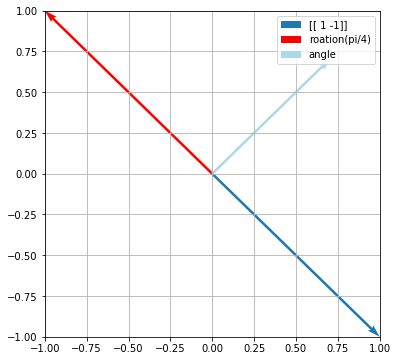

In [17]:
# Extra
# S(pi/4) rotation on vector (1 -1)

fig,ax = plt.subplots(figsize=(6,6))
plt.quiver(*origin, v0[:,0], v0[:,1], color='C0', label=f'{v0}', angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin, v1[:,0], v1[:,1], color='r', label='roation(pi/4)', angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin, theta_v[:,0], theta_v[:,1], color='#add8e6', label='angle', angles='xy', scale_units='xy', scale=1)
plt.grid(True)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend();

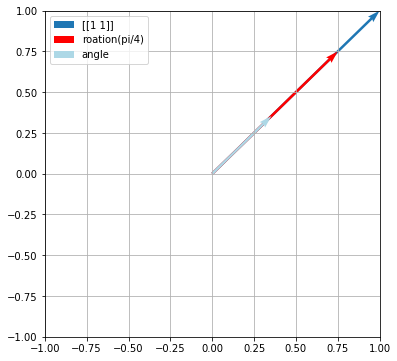

In [18]:
# Extra
# S(pi/4) rotation on vector (1 1)
# vector lies on the axis of relection

fig,ax = plt.subplots(figsize=(6,6))
plt.quiver(*origin, v2[:,0], v2[:,1], color='C0', label=f'{v2}', angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin, v3[:,0], v3[:,1], color='r', label='roation(pi/4)', angles='xy', scale_units='xy', scale=4/3)
plt.quiver(*origin, theta_v[:,0], theta_v[:,1], color='#add8e6', label='angle', angles='xy', scale_units='xy', scale=2)
plt.grid(True)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend(loc='upper left');

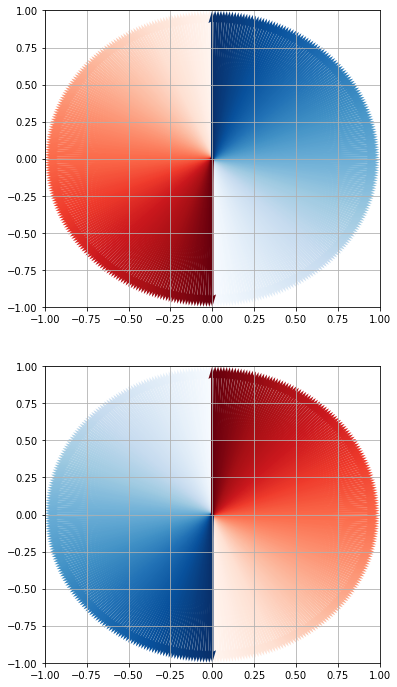

In [19]:
# Extra
# ALl reflections from theta [0,2pi]

N = 180
fig,axs = plt.subplots(2,1,figsize=(6,12))
Bcolors = plt.cm.Blues(np.linspace(0,1,N))
Rcolors = plt.cm.Reds(np.linspace(0,1,N))
for i,n in enumerate(np.linspace(0,np.pi,N)):
    v0 = np.matrix([[np.cos(n-np.pi/2),np.sin(n-np.pi/2)]])
    v1 = np.dot(v0,S(n))
    axs[0].quiver(*origin, v0[:,0], v0[:,1], color=Bcolors[i], angles='xy', scale_units='xy', scale=1)
    axs[0].quiver(*origin, v1[:,0], v1[:,1], color=Rcolors[i], angles='xy', scale_units='xy', scale=1)

axs[0].grid(True)
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

for i,n in enumerate(np.linspace(np.pi,2*np.pi,N)):
    v0 = np.matrix([[np.cos(n-np.pi/2),np.sin(n-np.pi/2)]])
    v1 = np.dot(v0,S(n))
    axs[1].quiver(*origin, v0[:,0], v0[:,1], color=Bcolors[i], angles='xy', scale_units='xy', scale=1)
    axs[1].quiver(*origin, v1[:,0], v1[:,1], color=Rcolors[i], angles='xy', scale_units='xy', scale=1)

axs[1].grid(True)
axs[1].set_xlim(-1, 1)
axs[1].set_ylim(-1, 1)
plt.show();

### 7. Similarity

Show that the following two matrices are similar.

$
A = \begin{pmatrix}
2 & 4 & 6 \\
0 & 2 & 0 \\
1 & 1 & 0
\end{pmatrix}
$

B = $
\begin{pmatrix}
1 & -1 & 2 \\
4 & 2 & 1 \\
5 & 1 & 1
\end{pmatrix}
$

<hr>

**Def:** $A$ and $B$ are **similar** if there exists an invertible matrix $A$ such that $B = Q A Q^{-1}$. 

<hr>

In [20]:
A = sp.Matrix([
    [2,4,6],
    [0,2,0],
    [1,1,0]
])
B = sp.Matrix([
    [1,-1,2],
    [4,2,1],
    [5,1,1]
])

In [60]:
Q = sp.Matrix(np.random.randint(-1,1,(3,3)))
while (1):
    if Q.det() == 0:
        Q = sp.Matrix(np.random.randint(-1,1,(3,3)))
        continue
    if B != Q * A * Q.inv():
        Q = sp.Matrix(np.random.randint(-1,1,(3,3)))
        continue
    else:
        break

assert B == Q * A * Q.inv(), "B != QAQ^-1"
print("B == QAQ^-1")

B == QAQ^-1


Given $A$ and $B$, I solved for $Q$ such that it is invertable and holds the condition $B = QAQ^{-1}$.
<br>
Q = $
\begin{pmatrix}
0 & -1 & -1 \\
-1 & 0 & -1 \\
-1 & -1 & 0
\end{pmatrix}
$

### 8. Diagonalization

Diagonalize the matrices in problem 7 (you can use `sympy`) and show they have the same diagonal form.

<hr>
Our first attempt is called diagonalization, which attempts to represent an equivalence class of matrices by one that has all the eigenvalues on the diagonal.
Consider the matrix $A = \mathbb{R}^{n \times n}$. Say $A$ has distinct real eigenvalues $\lambda_1$ and $\lambda_2$ with eigenvectors $v_1$ and $v_2$. Then

$$
A v_1 = \lambda_1 v_1 \\
A v_2 = \lambda_2 v_2 
$$

which can be written

$$
\left( A v_1 \; A v_2 \right) = ( \lambda_1 v_1 \; \lambda_2 v_2 )
$$

or even better

$$
A ( v_1 \; v_2 ) = ( v_1 \; v_2 ) 
\begin{pmatrix}\lambda_1 & 0\\ 0 & \lambda_2\end{pmatrix}
$$

If we define 

$$
P = ( v_1 \; v_2 )
$$

and 

$$
D = \begin{pmatrix}\lambda_1 & 0\\ 0 & \lambda_2\end{pmatrix}
$$

then we get

$$
AP = PD
$$

or

$$
A = PDP^{-1}
$$

<hr>

In [59]:
A = sp.Matrix([
    [2,4,6],
    [0,2,0],
    [1,1,0]
])
B = sp.Matrix([
    [1,-1,2],
    [4,2,1],
    [5,1,1]
])
# Diagonalize returns a tuple (P,D), where D is diagonal and M = PDP^−1
P1, D1 = A.diagonalize()
P2, D2 = B.diagonalize()
assert D1==D2, "A and B don't have the same diagonal form"

Diagonal of $A$ is
$\begin{pmatrix}
2 & 0 & 0 \\
0 & 1 + \sqrt{7} & 0 \\
0 & 0 & -\sqrt(7) + 1
\end{pmatrix}$
<br><br>
Diagonal of $B$ is 
$\begin{pmatrix}
2 & 0 & 0 \\
0 & 1 + \sqrt{7} & 0 \\
0 & 0 & -\sqrt(7) + 1
\end{pmatrix}$

### 9. Cayley Hamilton

a) Use the Cayley Hamilton Theorem to come up with an expression for $A^n$ in terms of $n$ when 

$$
A = \begin{pmatrix}
-\frac{1}{2} & 1  \\
0 & \frac{1}{4}
\end{pmatrix} .
$$

b) Define $x_{k+1} = A x_k$ and argue that no matter what value $x_0$ is, $x_k$ converges to $(0 \; 0)^T$. 

c) Choose $x_0 = (-2,3)^T$ and plot $x_k$ for $k = 0$ to $10$. Plot the two components of of $x_k$ as two separate trajectories overlaid on the same plot.

In [74]:
A = sp.Matrix([
    [-sp.Rational(1,2),1],
    [0,sp.Rational(1,4)]
])
I = sp.Matrix([
    [1,0],
    [0,1]
])
t = sp.symbols('t')
print(sp.det(t*I-A))
print(A**2)
print(A**3)
#print(sp.Rational(11/256)*A-sp.Rational(5/512)*I)

(t - 1/4)*(t + 1/2)
Matrix([[1/4, -1/4], [0, 1/16]])
Matrix([[-1/8, 3/16], [0, 1/64]])


Express $A^n$ in terms of $n$:
<br><br>
$
A = \begin{pmatrix}
-\frac{1}{2} & 1  \\
0 & \frac{1}{4}
\end{pmatrix} 
$ with characteristic polynomial: $p(\lambda) = det(A - \lambda_1 I) = \lambda^2+\frac{\lambda}{4}-\frac{1}{8}$
<br><br>
$p(A) = A^n + x_1 A^{n-1} + \dots + x_{n-1}A + x_{n} I_n = 0$
<br><br>
$A^n = x_1 A^{n-1} + \dots + x_{n-1}A + x_{n} I_n$
<br><br>
$A^2 = \frac{-A}{4}+\frac{1}{8}I $.
<br><br>
$ \begin{eqnarray}
A^3 & = & \frac{-A^2}{4} +\frac{A}{8} \\
    & = & \frac{-1}{4}(\frac{-A}{4} + \frac{1}{8}I) + \frac{1}{8}A \\
    & = & \frac{3A}{16} - \frac{1}{32}I
\end{eqnarray}$
<br><br>
$ \begin{eqnarray}
A^4 & = & \frac{3A^2}{16} - \frac{A}{32} \\
    & = & \frac{3}{16}(\frac{-A}{4} + \frac{1}{8}I) - \frac{A}{32} \\
    & = & \frac{-5A}{64} + \frac{3}{128}I
\end{eqnarray}$
<br><br>
$ \begin{eqnarray}
A^5 & = & \frac{-5A^2}{64} + \frac{3A}{128} \\
    & = & \frac{-5}{64}(\frac{-A}{4} + \frac{1}{8}I) + \frac{3A}{128} \\
    & = & \frac{11A}{256} - \frac{5}{512}I
\end{eqnarray}$
<br><br>
$\dots$
<br><br>
$A^{-1} = 8A+2I $.
<br><br>
$ \begin{eqnarray}
A^{-2} & = & 8I+2A^{-1} \\
       & = & 8I + 2(8A+2I) \\
       & = & 16A +2I
\end{eqnarray}$

<hr>

Show $x_{k+1} = A x_k$
<br><br>
- $A^k + x_1 A^{k-1} + \dots + x_{k-1}A + x_{k} I_k = 0 $ so 
<br><br>
    - $x_{k}  = A^k + x_1 A^{k-1} + \dots + x_{k-1}A$ and 
<br><br>
    - $A = \frac{1}{x_{k-1}}(A^k + x_1 A^{k-1} + \dots  + x_{k} I_k)$
<br><br>
- $x_{k+1}  = A^{k+1} + x_1 A^{k} + \dots + x_{k}A$

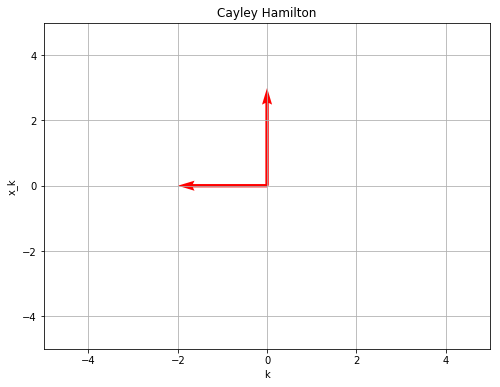

In [102]:
# plot
N = 10
𝑘 = np.arange(0,N+1)
origin = [0,0]
𝑥0=np.array([[-2],[3]])
fig,ax = plt.subplots(figsize=(8,6))
plt.quiver(*origin,x0[0],0, color='red',angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin,0,x0[1], color='red',angles='xy', scale_units='xy', scale=1)
plt.xlim(-5, 5)
plt.ylim(-5,5)
plt.title('Cayley Hamilton')
plt.xlabel('k')
plt.ylabel('x_k')
plt.grid(True);

### 10. Matrix Exponential Properties
---

Recall that for matrices $A$ and $B$ that it is not necessarily the case that $AB = BA$ (i.e. that $A$ and $B$ commute). Show that 

a) If $AB=BA$ then $e^Ae^B = e^Be^A$ using the definition of the matrix exponential as a series.

b) Find an example in 2D where $A$ and $B$ do not commute and show that $e^Ae^B \neq e^Be^A$.

- $ e^A = I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \dots$
- $ e^B = I + B + \frac{B^2}{2!} + \frac{B^3}{3!} + \dots$
<br>
$\begin{eqnarray}
e^Ae^B & = & (I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \dots) 
    (I + B + \frac{B^2}{2!} + \frac{B^3}{3!} + \dots) \\
       & = & I (I + B + \frac{B^2}{2!} + \frac{B^3}{3!} + \dots) + \\
       &   & A (I + B + \frac{B^2}{2!} + \frac{B^3}{3!} + \dots) + \\
       &   & \frac{A^2}{2!} (I + B + \frac{B^2}{2!} + \frac{B^3}{3!} + \dots) + \\
       &   & ... \\
       & = & I + B + \frac{B^2}{2!} + \frac{B^3}{3!} + A + AB + A\frac{B^2}{2!} + A\frac{B^3}{3!} + \frac{A^2}{2!} + \frac{A^2 B}{2!} +  \frac{A^2}{2!}\frac{B^2}{2!} + \dots \\
       & = & I + A + B + \frac{A^2}{2!} + AB + \frac{B^2}{2!} +\dots \\
       & = & I + (A+B) + \frac{A^2 + 2AB + B^2}{2!} + \dots \\
       & = & e^{A+B}
\end{eqnarray}$
<br><br>
Follow the same approach for $e^Be^A$
<br><br>
$\begin{eqnarray}
e^Be^A & = & I + (B+A) + \frac{B^2 + 2BA + A^2}{2!} + \dots \\
       & = & e^{B+A}
\end{eqnarray}$ 
<br><br>
Given $AB=BA$, then $e^{A+B}$ is the same as $e^{B+A}$
<br><br>
Thus $ e^Ae^B = e^{A+B} = e^{B+A} = e^Be^A$

In [26]:
A = sp.Matrix(np.random.randint(-1,1,(4,4)))
B = sp.Matrix(np.random.randint(-1,1,(4,4)))
while A*B==B*A:
    B = sp.Matrix(np.random.randint(-1,1,(4,4)))

print(A**2+2*A*B+B**2)
print(B**2+2*B*A+A**2)

Matrix([[2, 5, 7, 7], [3, 6, 10, 7], [1, 5, 8, 1], [3, 2, 6, 8]])
Matrix([[4, 7, 5, 5], [3, 6, 6, 3], [3, 7, 8, 3], [5, 4, 2, 6]])
A = Matrix([[-1, 0, -1, -1], [-1, -1, -1, -1], [0, -1, -1, 0], [-1, -1, 0, -1]])
B = Matrix([[0, 0, -1, -1], [0, 0, -1, 0], [0, -1, -1, 0], [0, 0, 0, -1]])


$A$ and $B$ do not commute such that $e^Ae^B \neq e^Be^A$ where
<br><br>
$A =
\begin{pmatrix}
-1 & -1 & -1 & -1 \\
0 & -1 & -1 & -1 \\
-1 & -1 & 0 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix} 
$ and 
<br><br>
$B =
\begin{pmatrix}
0 & 0 & -1 & 0 \\
0 & -1 & -1 & 0 \\
0 & 0 & -1 & -1 \\
-1 & -1 & -1 & 0
\end{pmatrix}$
<br><br>

It has been shown that $A^2+2AB+B^2 \neq B^2+2BA+A^2$.

### 11. Senators Revisited

Repeat the clustering of senators by voting habit for the years 1999, 1979 and 1959. Plot them together with the 2019 plot in a grid of plots. Which years seem the most divided? 

Note you will need to get the data at [https://voteview.com/data](https://voteview.com/data). Choose "Member's Votes", "Senate Only", the desired year, and CSV file. 

I had to edit the CSV file (in a text editor or ExCEL) to remove the heading in the first row before loading the file.

**Extra credit:** Color the each dot in the plots by whether the senator is a republican (red), democract (blue), or independent (green). This information is not in the data files above, so you'll need to find it elsewhere.

In [28]:
# Saves files in memory
# Requires pandas > 0.24
# source: https://voteview.com/articles/data_help_members
# source: https://voteview.com/static/data/out/parties/HSall_parties.csv
# source: https://voteview.com/static/data/out/votes

# Context for all members
url = "https://voteview.com/static/data/out/members/HSall_members.csv"
s=requests.get(url).content
all_members = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Context for all parties
url = "https://voteview.com/static/data/out/parties/HSall_parties.csv"
s=requests.get(url).content
all_parties = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Senate vote files
myfiles = {
    1959:{"congress":"086","df":None},
    1979:{"congress":"096","df":None},
    1999:{"congress":"106","df":None},
    2019:{"congress":"116","df":None}
}
for yr in myfiles:
    congress_num=myfiles[yr]["congress"]
    url=f'https://voteview.com/static/data/out/votes/S{congress_num}_votes.csv'
    print(yr,url)
    s=requests.get(url).content
    myfiles[yr]["df"]=pd.read_csv(io.StringIO(s.decode('utf-8')))

1959 https://voteview.com/static/data/out/votes/S086_votes.csv
1979 https://voteview.com/static/data/out/votes/S096_votes.csv
1999 https://voteview.com/static/data/out/votes/S106_votes.csv
2019 https://voteview.com/static/data/out/votes/S116_votes.csv


In [32]:
def votesByParty(votes,congress,all_members,all_parties):
    # Filter
    all_parties = all_parties[all_parties['congress']==congress]
    all_members = all_members[all_members['congress']==congress]
    
    # Find unique party codes and corresponding party name
    groups = all_parties.groupby('party_code')['party_name'].apply(lambda x: np.unique(x)[0])
    all_parties = pd.DataFrame(groups)
    
    # Join all_parties to all_members
    all_members = all_members.join(all_parties,how='left',on=['party_code'])
    all_members = all_members[['icpsr','party_code','party_name']]
    
    # Join all_members to votes
    votes = pd.merge(votes,all_members,left_on='icpsr',right_on='icpsr',how='left')
    
    # Separate parties by name
    #print(votes['party_name'].unique())
    votes['Republican'] = votes['party_name'].apply(lambda x: 1 if x=='Republican' else 0)
    votes['Democrat'] = votes['party_name'].apply(lambda x: 1 if x=='Democrat' else 0)
    votes['Independent'] = votes[['Republican','Democrat']].apply(\
        lambda row: 0 if (row['Republican'] or row['Democrat']) else 1,axis=1)
    
    return votes[votes['Republican']==1], votes[votes['Democrat']==1], votes[votes['Independent']==1]

In [47]:
def cluster(df):
    
    # The data is not in the form we want, so we have to transform it.
    # The data's columns are
    #    _, _, issue id, member id, vote outcome, _
    # where _ means we don't need this colum.
    issues = df['rollnumber'].to_numpy()   #my_data[:,2] 

    members = df['icpsr'].to_numpy()   #my_data[:,3]
    member_ids = np.unique(members)
    members = [np.where(member_ids == m)[0][0] for m in members]

    votes = df['cast_code'].to_numpy()   #my_data[:,4]

    yn = [ 0, 1, 1, 1, -1, -1, -1, 0, 0, 0 ]
    votes = np.array([yn[v] for v in votes])
    
    A = np.zeros((len(member_ids), max(issues)+1))
    for member, issue, vote in zip(members, issues, votes):
        A[int(member),int(issue)] = vote

    # Center the data at zero
    X = A - np.mean(A)

    # Singular-value decomposition
    U, s, VT = scipy.linalg.svd(X)

    # create m x n Sigma matrix
    Sigma = np.zeros((A.shape[0], A.shape[1]))

    # populate Sigma with n x n diagonal matrix
    Sigma[:A.shape[0], :A.shape[0]] = np.diag(s)

    # select
    n_elements = 2
    Sigma = Sigma[:, :n_elements]    
    
    T = U.dot(Sigma)
    
    return T

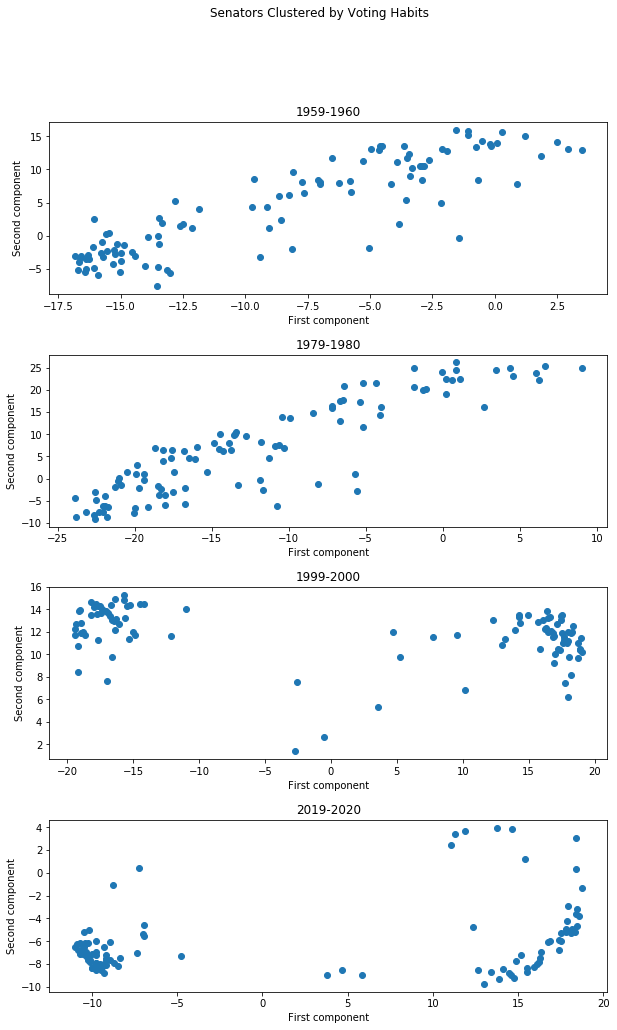

In [48]:
# plot all votes anomonously

fig,axs = plt.subplots(len(myfiles),1,figsize=(10,16))
plt.subplots_adjust(hspace=0.35)
fig.suptitle('Senators Clustered by Voting Habits')

for i,yr in enumerate(myfiles):
    df = myfiles[yr]["df"]
    
    # Here's a plot of the data. It shows the senators clustering into two
    # main clusters. One of the clusters is more varied than the other, suggesting
    # more independence within that cluster. It also shows there are a number of 
    # senators who do not really vote with either cluster.
    T = cluster(df)
    axs[i].scatter(T[:,0], T[:,1])

    #plt.gca().set_aspect(2)
    axs[i].set_title(f"{yr}-{yr+1}")
    axs[i].set_xlabel("First component")
    axs[i].set_ylabel("Second component")
    
    
plt.show();

Votes in 2019 and 1999 have the most division between parties. Votes in 1959 and 1979 are not as clustered and follow a gradual trendline.

In [47]:
# Extra Credit 

def partial_cluster(df,len_member_ids,max_issues):
    
    # The data is not in the form we want, so we have to transform it.
    # The data's columns are
    #    _, _, issue id, member id, vote outcome, _
    # where _ means we don't need this colum.
    issues = df['rollnumber'].to_numpy()   #my_data[:,2] 

    members = df['icpsr'].to_numpy()   #my_data[:,3]
    member_ids = np.unique(members)
    members = [np.where(member_ids == m)[0][0] for m in members]

    votes = df['cast_code'].to_numpy()   #my_data[:,4]

    yn = [ 0, 1, 1, 1, -1, -1, -1, 0, 0, 0 ]
    votes = np.array([yn[v] for v in votes])
    
    A = np.zeros((len(member_ids), max(issues)+1))
    for member, issue, vote in zip(members, issues, votes):
        A[int(member),int(issue)] = vote

    # Center the data at zero
    X = A - np.mean(A)

    # Singular-value decomposition
    U, s, VT = scipy.linalg.svd(X)

    # create m x n Sigma matrix
    Sigma = np.zeros((A.shape[0], A.shape[1]))

    # populate Sigma with n x n diagonal matrix
    Sigma[:A.shape[0], :A.shape[0]] = np.diag(s)

    # select
    n_elements = 2
    Sigma = Sigma[:, :n_elements]    
    
    T = U.dot(Sigma)
    
    return T

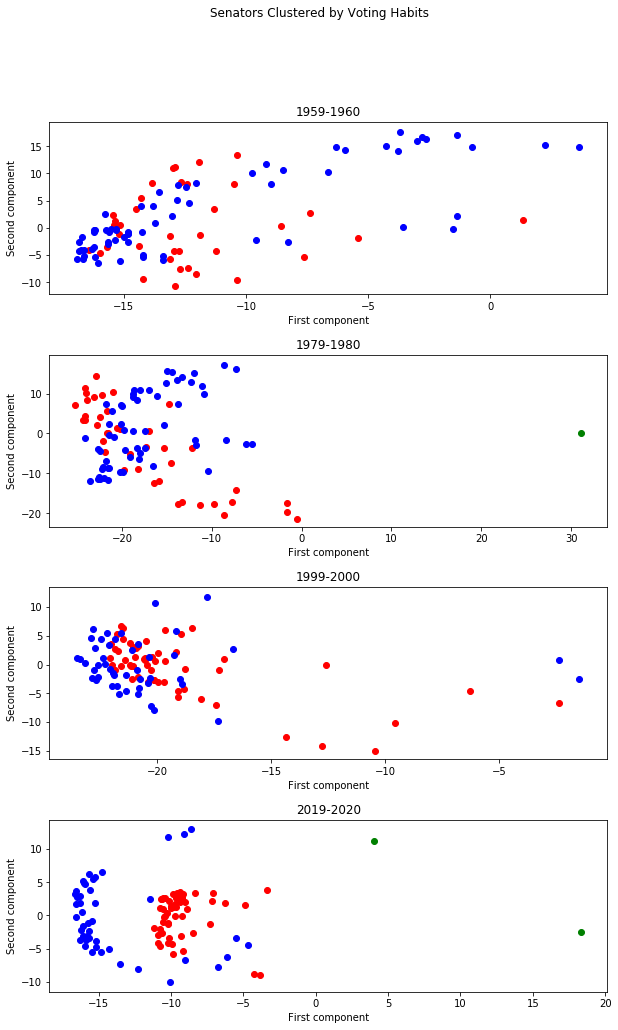

In [35]:
# Extra Credit

fig,axs = plt.subplots(len(myfiles),1,figsize=(10,16))
plt.subplots_adjust(hspace=0.35)
fig.suptitle('Senators Clustered by Voting Habits')

for i,yr in enumerate(myfiles):
    df = myfiles[yr]["df"]
    congress = int(myfiles[yr]["congress"])
    
    # Seperate votes by party
    rep,dem,ind = votesByParty(df,congress,all_members,all_parties)
    
    
    # Here's a plot of the data. It shows the senators clustering into two
    # main clusters. One of the clusters is more varied than the other, suggesting
    # more independence within that cluster. It also shows there are a number of 
    # senators who do not really vote with either cluster.
    if len(rep)>0:
        T = partial_cluster(rep)
        axs[i].scatter(T[:,0], T[:,1],color='red',label='Republican')
    
    if len(dem)>0:
        T = partial_cluster(dem)
        axs[i].scatter(T[:,0], T[:,1],color='blue',label='Democrat')
    
    if len(ind)>0:
        T = partial_cluster(ind)
        axs[i].scatter(T[:,0], T[:,1],color='green',label='Independent')
    
    #plt.gca().set_aspect(2)
    axs[i].set_title(f"{yr}-{yr+1}")
    axs[i].set_xlabel("First component")
    axs[i].set_ylabel("Second component")
    
    
plt.show();